# Visualization with Seaborn

There are several valid complaints about Matplotlib that often come up:

* Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
* Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.
* Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrames. In order to visualize data from a Pandas DataFrame, you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.

An answer to these problems is Seaborn. 

## Seaborn Versus Matplotlib

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

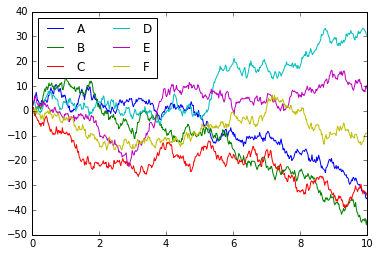

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [4]:
import seaborn as sns
sns.set()

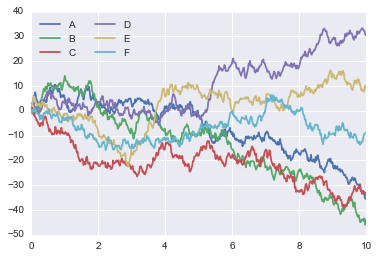

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Seaborn Plots

### Histograms, KDE, and densities

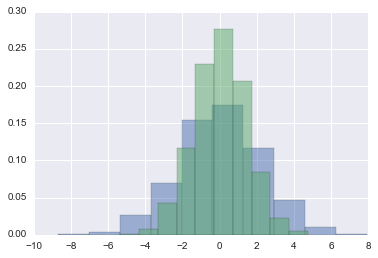

In [7]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

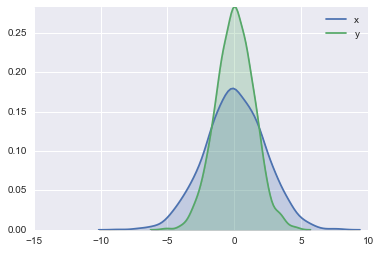

In [9]:
# using seaborn kernel density
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


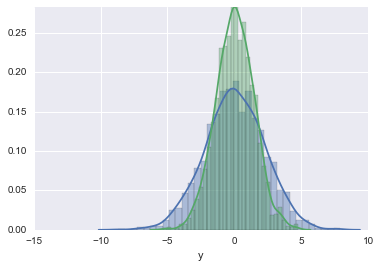

In [10]:
sns.distplot(data['x'])
sns.distplot(data['y']);

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


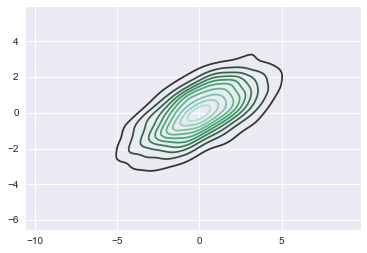

In [11]:
# 2D visualization
sns.kdeplot(data);

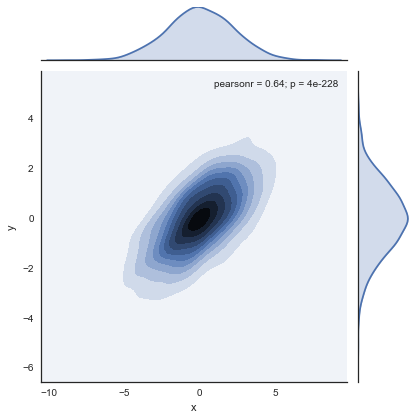

In [12]:
# show distribution of each variable on each axis
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


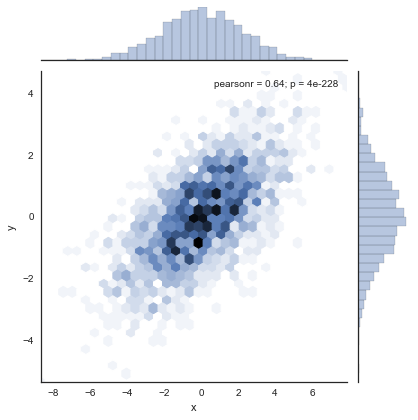

In [13]:
# show distribution of each variable on each axis
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

In [14]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

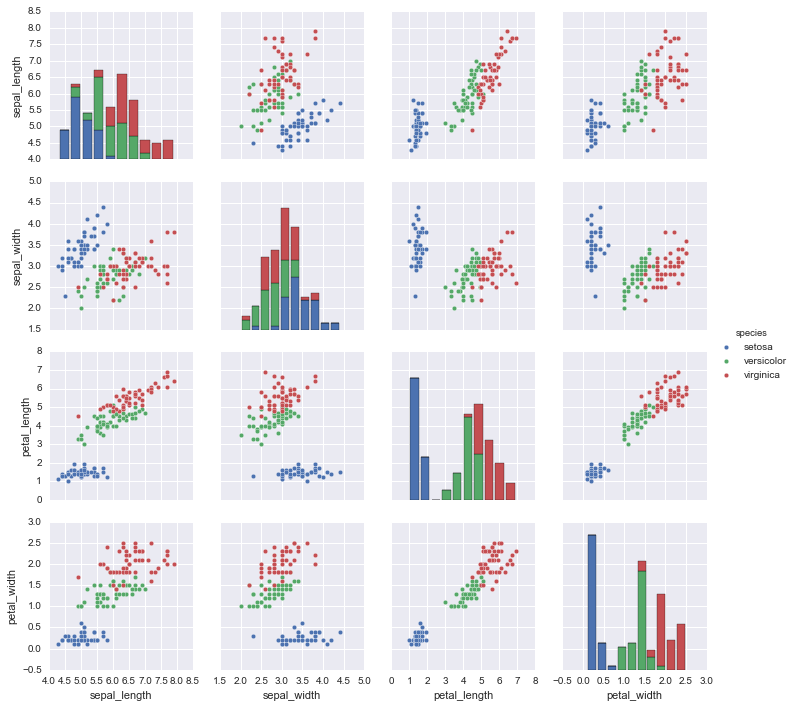

In [15]:
# Visualizing the multidimensional relationships among the sample
sns.pairplot(iris, hue='species', size=2.5);

### Faceted histograms

In [18]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

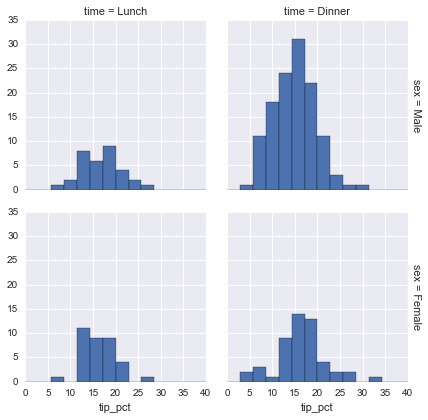

In [19]:
# best way to view data is via histograms of subsets
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

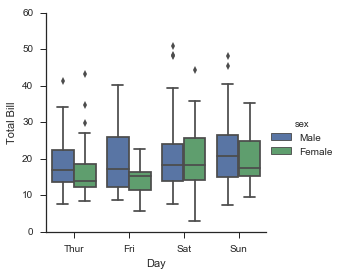

In [20]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


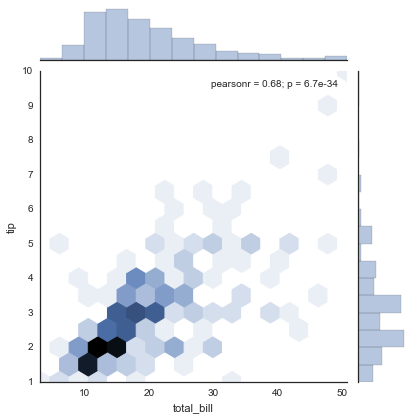

In [21]:
# pearson coefficient of correlation
# p-value statistic indicator
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


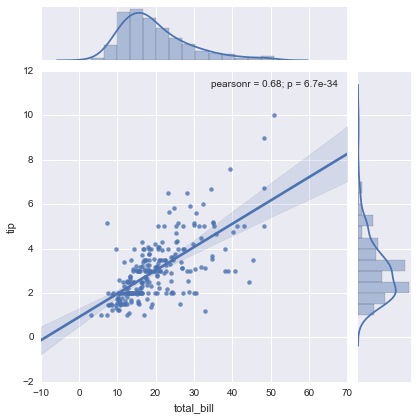

In [22]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


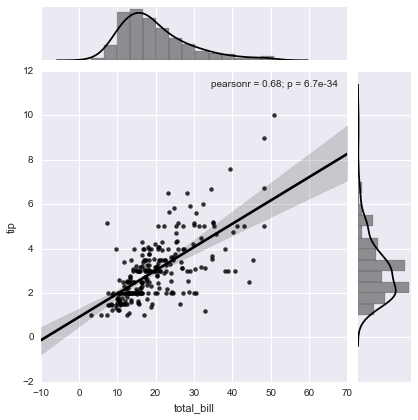

In [26]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg', color="black", dropna=True);

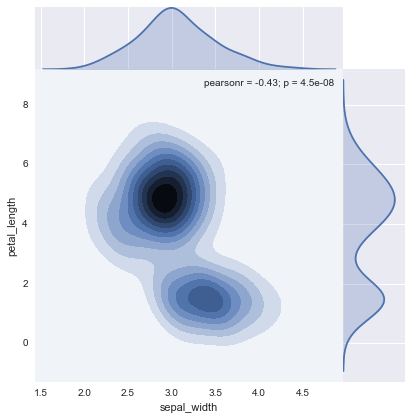

In [31]:
g = sns.jointplot("sepal_width", "petal_length", data=iris,
                       kind="kde", space=0)

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


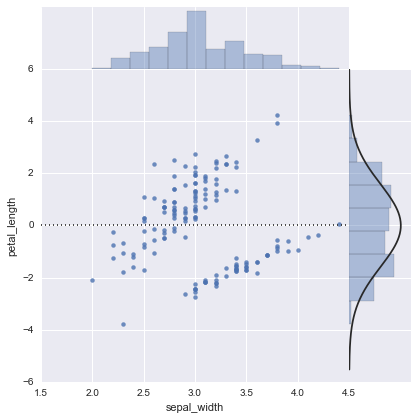

In [38]:
g = sns.jointplot("sepal_width", "petal_length", data=iris,
                       kind="resid", space=0)

### Bar plots

In [32]:
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

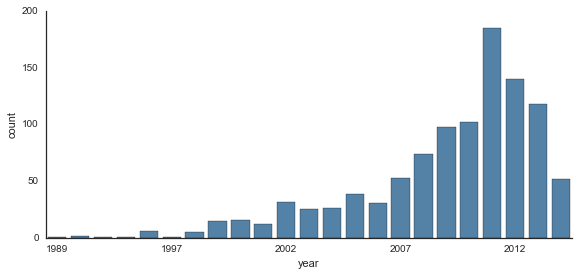

In [33]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

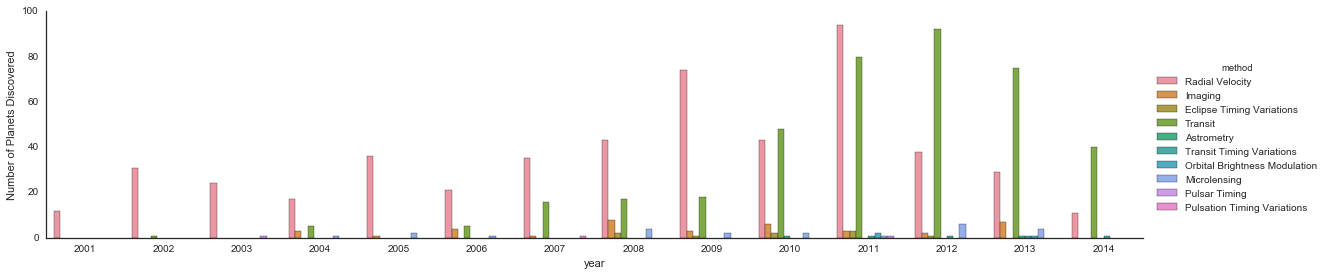

In [34]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Example: Exploring Marathon Finishing Times

In [39]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0   720k      0  0:00:01  0:00:01 --:--:--  720k


In [40]:
data = pd.read_csv('marathon-data.csv')
data.head()

age gender     split     final
0   33      M  01:05:38  02:08:51
1   32      M  01:06:26  02:09:28
2   31      M  01:06:49  02:10:42
3   38      M  01:06:16  02:13:45
4   31      M  01:06:32  02:13:59

In [41]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [42]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_lau

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_lau

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.core.

age gender    split    final
0   33      M 01:05:38 02:08:51
1   32      M 01:06:26 02:09:28
2   31      M 01:06:49 02:10:42
3   38      M 01:06:16 02:13:45
4   31      M 01:06:32 02:13:59

In [43]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [44]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

age gender    split    final  split_sec  final_sec
0   33      M 01:05:38 02:08:51     3938.0     7731.0
1   32      M 01:06:26 02:09:28     3986.0     7768.0
2   31      M 01:06:49 02:10:42     4009.0     7842.0
3   38      M 01:06:16 02:13:45     3976.0     8025.0
4   31      M 01:06:32 02:13:59     3992.0     8039.0

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


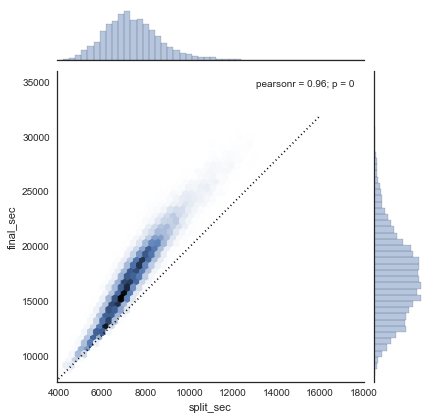

In [45]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [46]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

age gender    split    final  split_sec  final_sec  split_frac
0   33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756
1   32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262
2   31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443
3   38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097
4   31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


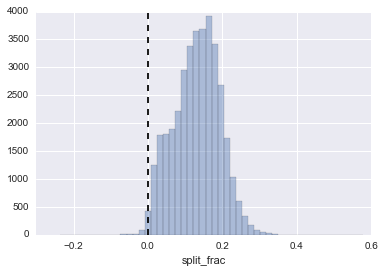

In [47]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [48]:
# Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon
# they run faster the second part than the first part of the race
sum(data.split_frac < 0)

251

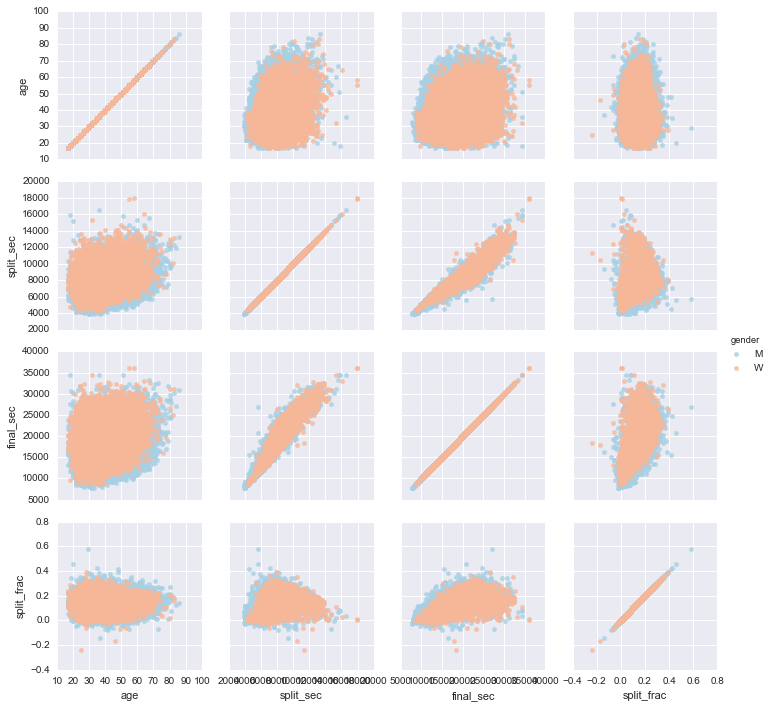

In [51]:
# It looks like the split fraction does not correlate particularly with age, but does correlate with the final time
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

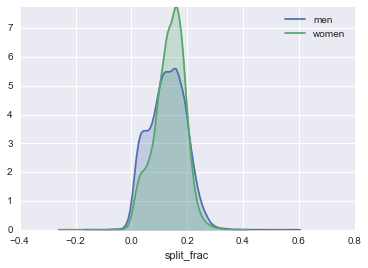

In [53]:
# The interesting thing here is that there are many more men than women who are running close to an even split! 
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

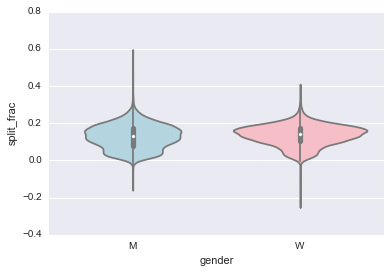

In [54]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [56]:
# create decade column data
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

age gender    split    final  split_sec  final_sec  split_frac  age_dec
0   33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756       30
1   32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262       30
2   31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443       30
3   38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097       30
4   31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842       30

In [57]:
# only 7 people are over 80 years old
(data.age > 80).sum()

7

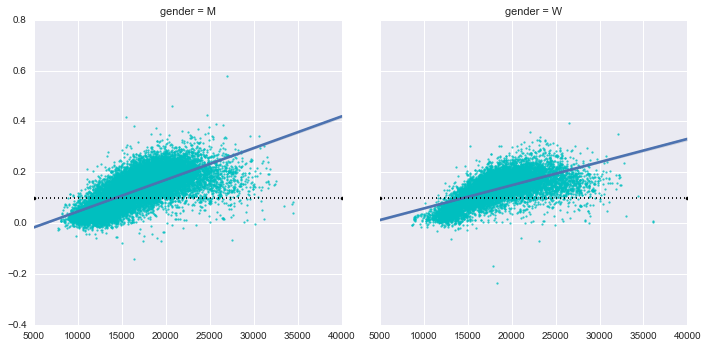

In [58]:
# Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");